In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df = pd.read_csv('./dataset/Gold-price.csv')

In [4]:
df.head()

,Date,Price
0,2004-10-01,6329
1,2004-11-01,6528
2,2004-12-01,6307
3,2005-01-01,6000
4,2005-02-01,6245


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    236 non-null    object
 1   Price   236 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
gld_series = df['Price']

In [8]:
gld_series

0       6329
1       6528
2       6307
3       6000
4       6245
       ...  
231    62958
232    62567
233    67677
234    70415
235    72050
Name: Price, Length: 236, dtype: int64

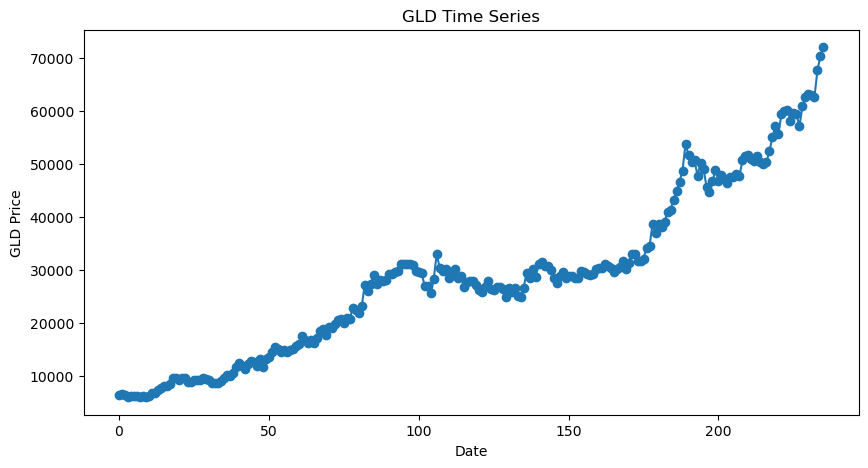

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(gld_series, marker='o')
plt.title("GLD Time Series")
plt.xlabel("Date")
plt.ylabel("GLD Price")
plt.show()

## Check Stationarity Using the Augmented Dickey-Fuller (ADF) Test

## P values <= 0.05 --> Null hypothisis

In [10]:
result = adfuller(gld_series)
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])

ADF Statistic: 1.555402
p-value: 0.997717


In [11]:
if result[1] > 0.05:
    print("Data is non-stationary. Differencing the data to achieve stationarity.")

Data is non-stationary. Differencing the data to achieve stationarity.


In [12]:
result

(1.5554018504624245,
 0.9977174136891875,
 0,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 3798.3580584217357)

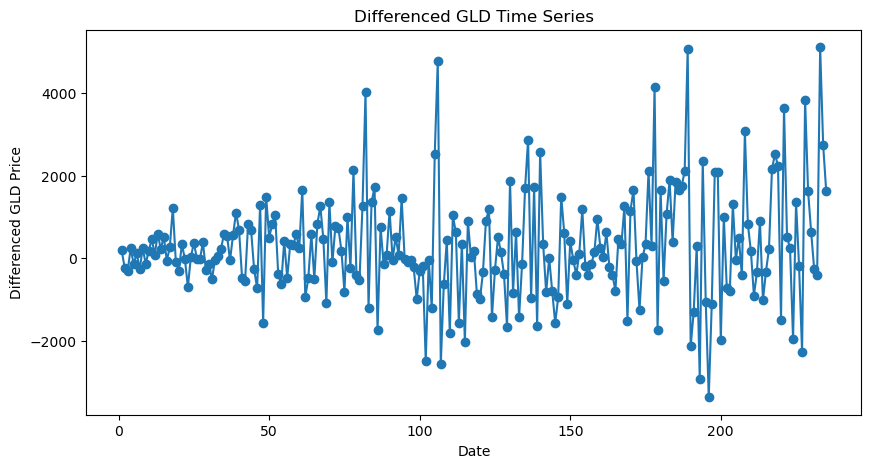

In [13]:
gld_diff = gld_series.diff().dropna()
    
# Plot the differenced series
plt.figure(figsize=(10, 5))
plt.plot(gld_diff, marker='o')
plt.title("Differenced GLD Time Series")
plt.xlabel("Date")
plt.ylabel("Differenced GLD Price")
plt.show()

In [14]:
result_diff = adfuller(gld_diff)
print("After differencing:")
print("ADF Statistic: %f" % result_diff[0])
print("p-value: %f" % result_diff[1])

After differencing:
ADF Statistic: -16.345172
p-value: 0.000000


Data is non-stationary. Differencing the data to achieve stationarity.


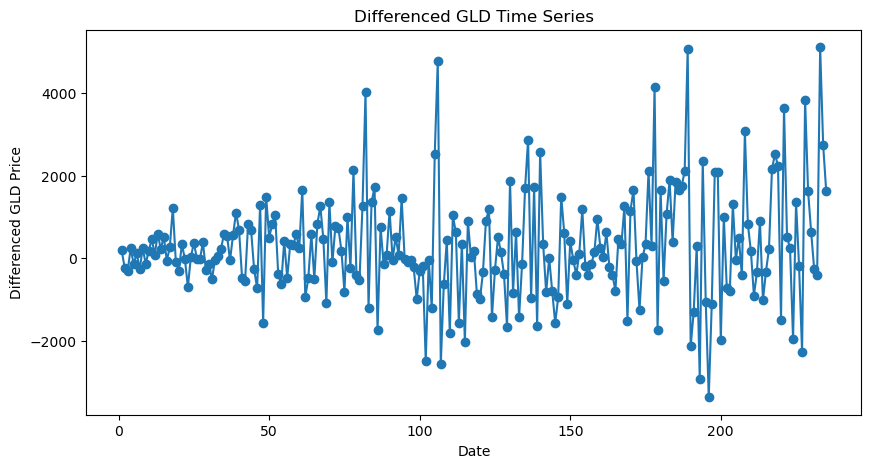

After differencing:
ADF Statistic: -16.345172
p-value: 0.000000


In [15]:
if result[1] > 0.05:
    print("Data is non-stationary. Differencing the data to achieve stationarity.")
    # First differencing
    gld_diff = gld_series.diff().dropna()
    
    # Plot the differenced series
    plt.figure(figsize=(10, 5))
    plt.plot(gld_diff, marker='o')
    plt.title("Differenced GLD Time Series")
    plt.xlabel("Date")
    plt.ylabel("Differenced GLD Price")
    plt.show()
    
    # Re-run ADF test on differenced data
    result_diff = adfuller(gld_diff)
    print("After differencing:")
    print("ADF Statistic: %f" % result_diff[0])
    print("p-value: %f" % result_diff[1])
    d = 1  # The order of differencing
else:
    print("Data is stationary. No differencing is required.")
    gld_diff = gld_series
    d = 0

## Identify p and q Using ACF and PACF Plots

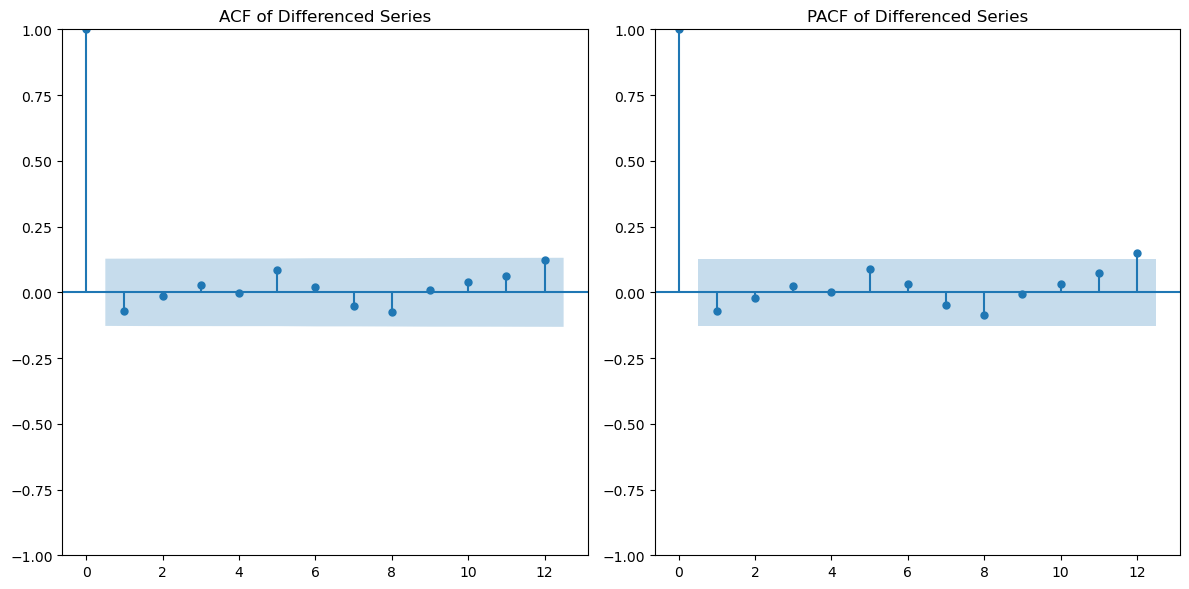

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(gld_diff, lags=12, ax=plt.gca())
plt.title("ACF of Differenced Series")

plt.subplot(122)
plot_pacf(gld_diff, lags=12, ax=plt.gca(), method='ywm')
plt.title("PACF of Differenced Series")
plt.tight_layout()
plt.show()

In [17]:
model_110 = ARIMA(gld_series, order=(1,1,0)).fit()
print("ARIMA(1,1,0) AIC:", model_110.aic)

ARIMA(1,1,0) AIC: 4054.9950753906346


In [18]:
model_011 = ARIMA(gld_series, order=(0,1,1)).fit()
print("ARIMA(0,1,1) AIC:", model_011.aic)

ARIMA(0,1,1) AIC: 4055.0311775405276


In [19]:
model_111 = ARIMA(gld_series, order=(1,1,1)).fit()
print("ARIMA(1,1,1) AIC:", model_111.aic)

ARIMA(1,1,1) AIC: 4048.989163823653


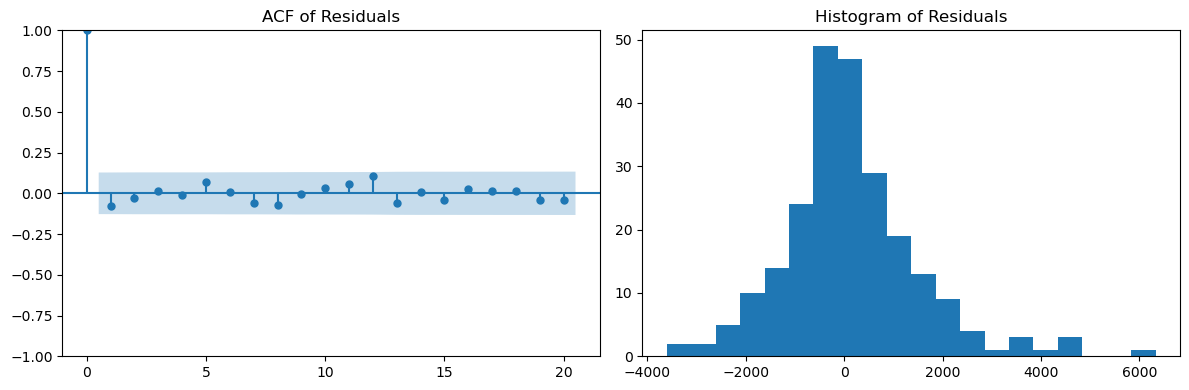

In [20]:
residuals = model_111.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sm.graphics.tsa.plot_acf(residuals, lags=20, ax=ax[0])
ax[0].set_title("ACF of Residuals")

ax[1].hist(residuals, bins=20)
ax[1].set_title("Histogram of Residuals")

plt.tight_layout()
plt.show()

In [21]:
model = ARIMA(gld_series, order=(1,1,1))
model_fit = model.fit()

In [22]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  236
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2021.495
Date:                Wed, 26 Feb 2025   AIC                           4048.989
Time:                        19:34:59   BIC                           4059.368
Sample:                             0   HQIC                          4053.173
                                - 236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9984      0.008    127.220      0.000       0.983       1.014
ma.L1         -0.9875      0.025    -39.436      0.000      -1.037      -0.938
sigma2      1.729e+06   4.96e-10   3.49e+15      0.0

In [23]:
forecast_horizon = 10

# Forecast the next 10 periods
forecast = model_fit.forecast(steps=forecast_horizon)

print(forecast)

236    72424.460779
237    72798.318099
238    73171.572932
239    73544.226249
240    73916.279021
241    74287.732214
242    74658.586794
243    75028.843728
244    75398.503977
245    75767.568503
Name: predicted_mean, dtype: float64


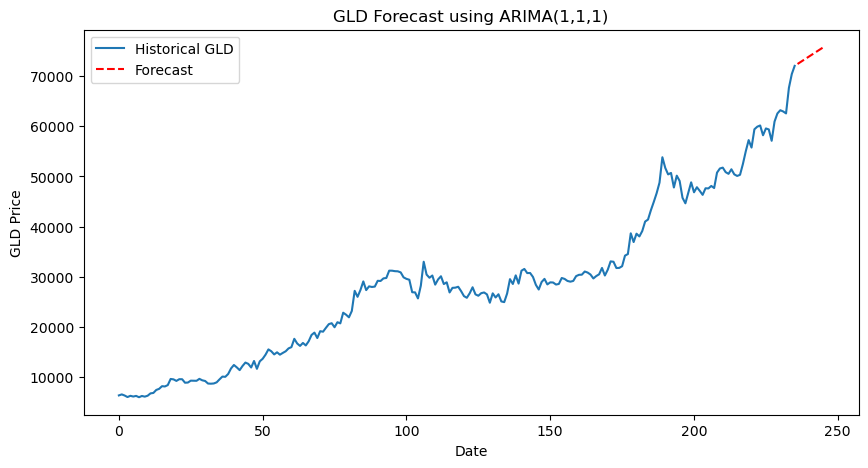

In [25]:
plt.figure(figsize=(10,5))

# Plot historical data
plt.plot(gld_series, label='Historical GLD')

# Plot forecast
plt.plot(forecast, label='Forecast', linestyle='--', color='red')

plt.title('GLD Forecast using ARIMA(1,1,1)')
plt.xlabel('Date')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
